In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# File Name
test_scores_file = 'test_scores.csv'


In [4]:
# Load the dataset
file_path = f"C:\\Users\\User\\Documents\\Intership project final\\{test_scores_file}"
df = pd.read_csv(file_path)

In [5]:
# Display basic information about the dataset
print(f"Dataset: {test_scores_file}")
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

Dataset: test_scores.csv
Dataset Head:
   school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  
0      2FHT3  Female  Does not qualify     62.0      72.0  
1      3JIVH  Female  Does not qualify     66.0      79.0  
2      3XOWE    Male  Does not qualify     64.0      76.0  
3      556O0  Female  Does not qualify     61.0      77.0  
4      74LOE    Male  Does not qualify     64.0      76.0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column         

In [6]:
# Set Seaborn style
sns.set(style="whitegrid")


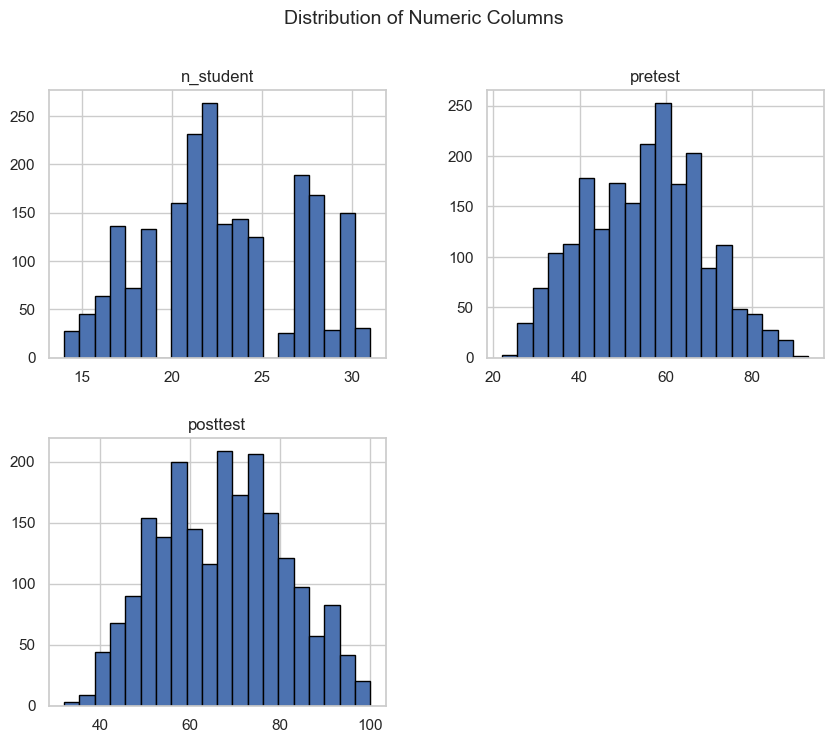

In [7]:
# Histogram of all numerical columns
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numeric Columns', fontsize=14)
plt.show()

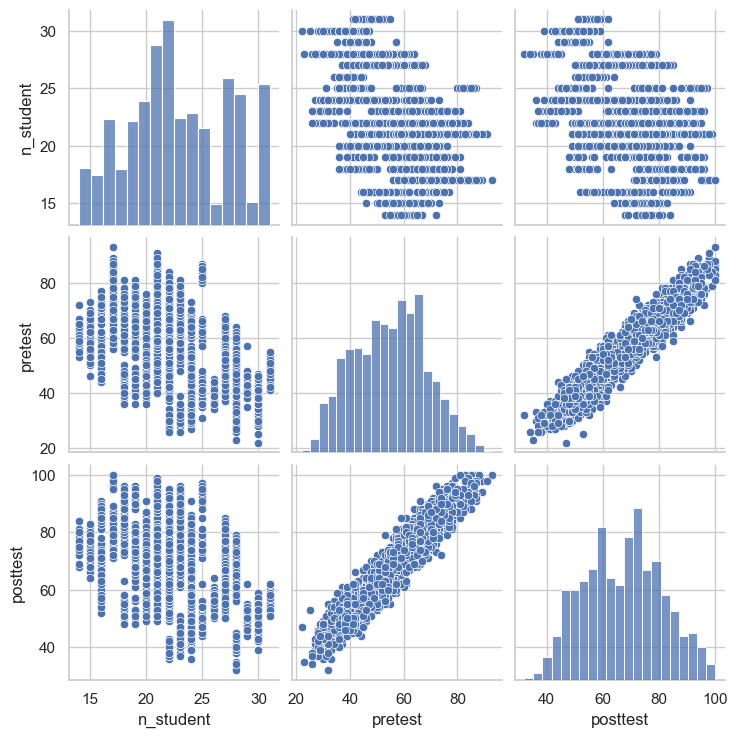

In [8]:
# Pairplot to see relationships between variables
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df)
plt.show()

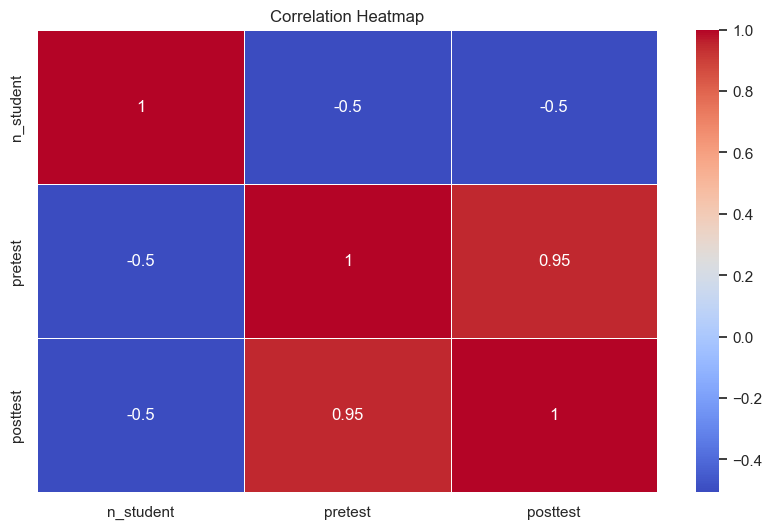

In [9]:
# Correlation Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

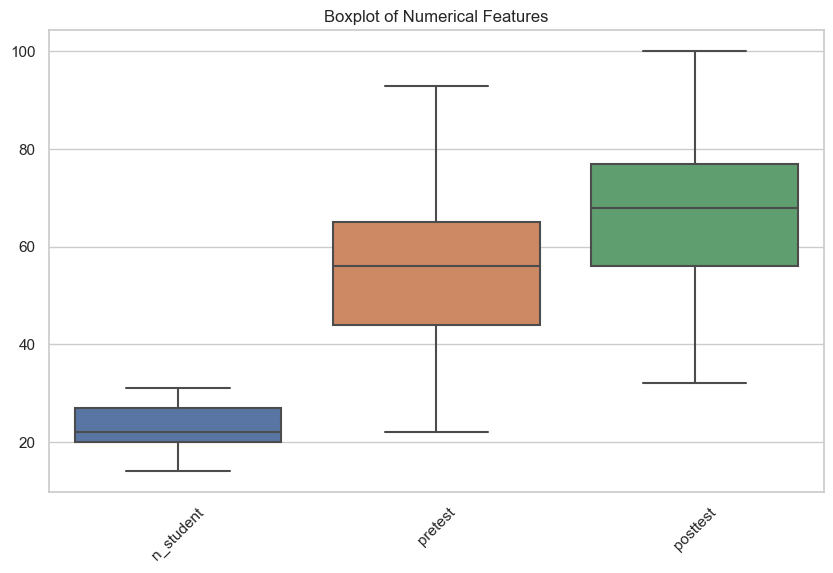

In [10]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()


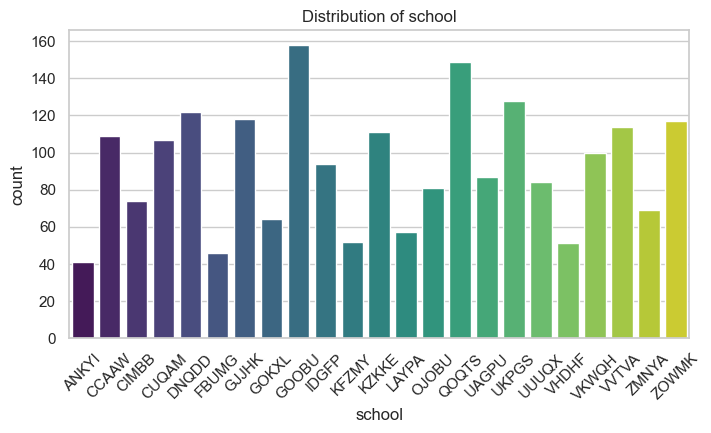

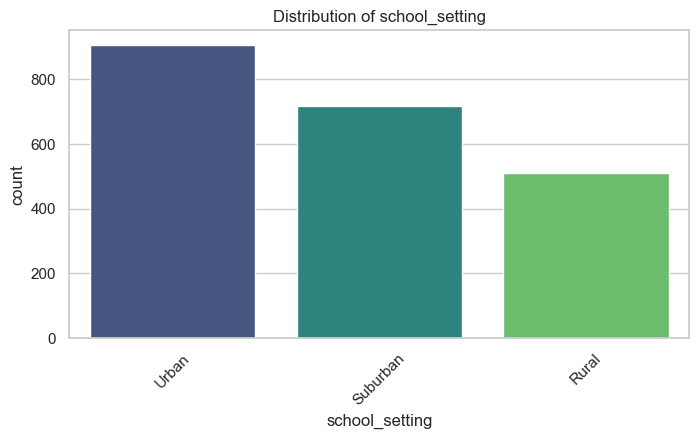

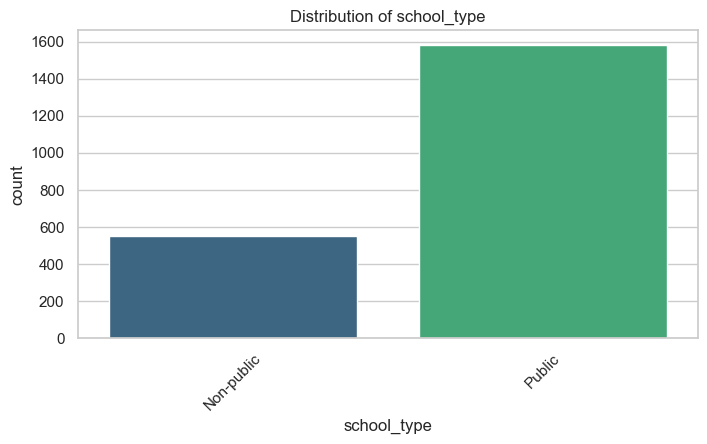

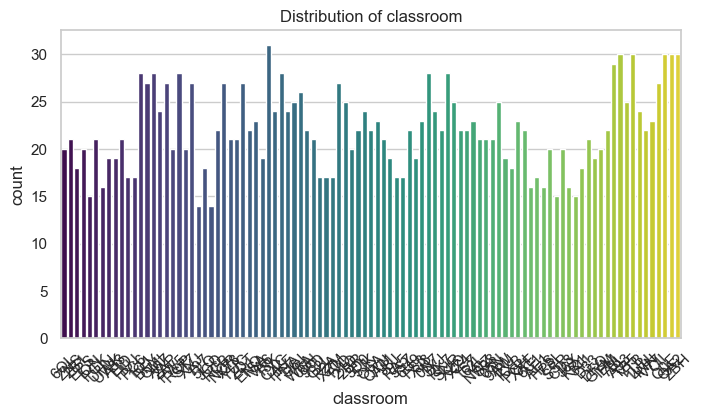

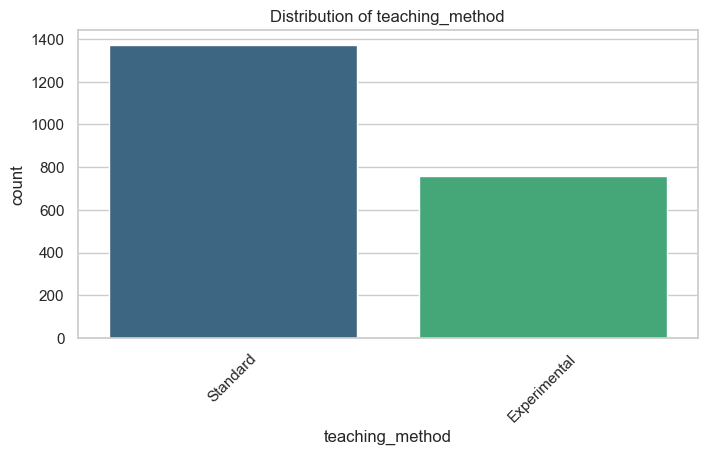

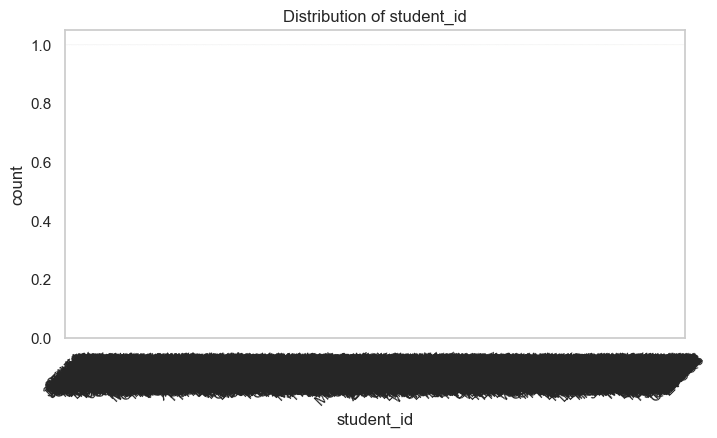

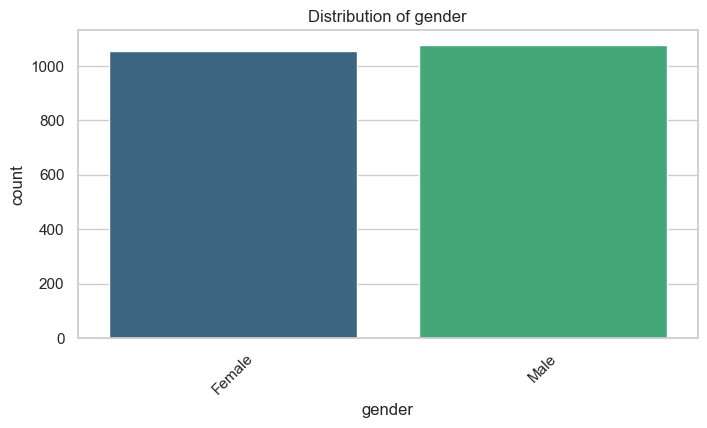

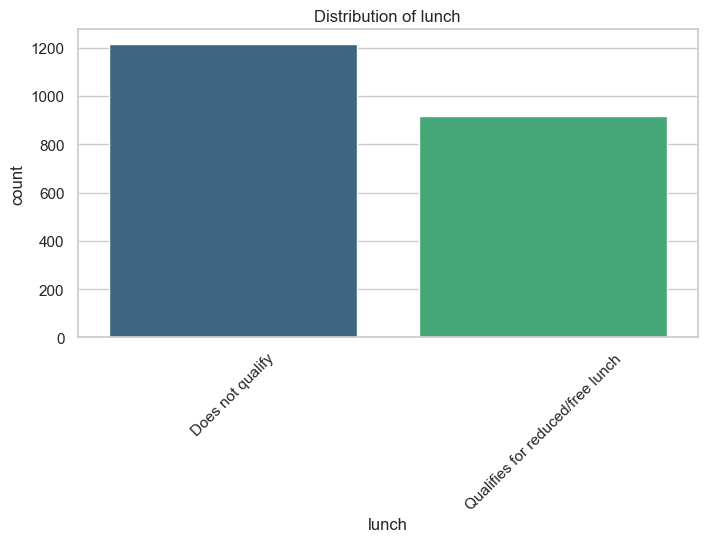

In [11]:
# Bar plots for categorical variables (if present)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
# Display all column names
print("Dataset Columns:", df.columns.tolist())

Dataset Columns: ['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'n_student', 'student_id', 'gender', 'lunch', 'pretest', 'posttest']


In [13]:
# Prepare data for model training 
target_column = "posttest" 

In [14]:
# postest is used because-
# --The goal is to predict how well a student performs after instruction.
# --posttest reflects their final performance, making it the best measure of learning success.

In [15]:
# One-hot encode categorical features
categorical_cols = ['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch','student_id']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
# Split features (X) and target (y)
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

In [17]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.dtypes)

n_student           float64
pretest             float64
school_CCAAW           bool
school_CIMBB           bool
school_CUQAM           bool
                     ...   
student_id_ZVCQ8       bool
student_id_ZVM0Q       bool
student_id_ZX8TB       bool
student_id_ZY9X3       bool
student_id_ZZGRB       bool
Length: 2258, dtype: object


In [19]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions
y_pred = model.predict(X_test)


In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [22]:
print(f'Model Performance:\nMean Squared Error: {mse}\nR-Squared Score: {r2}')


Model Performance:
Mean Squared Error: 8.637477715779102
R-Squared Score: 0.9570578701943829


In [23]:
print("Exploratory Data Analysis and Model Training Completed.")

Exploratory Data Analysis and Model Training Completed.


In [27]:
jupyter nbconvert --to html Project.ipynb

SyntaxError: invalid syntax (1187927255.py, line 1)